In [1]:
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=20,random_state=27)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=27)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [6]:
Model1 = LogisticRegression()

In [7]:
Model2 = KNeighborsClassifier(n_neighbors=4)

In [8]:
Model1.fit(X_train,y_train)
Model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
pred_prob1 = Model1.predict_proba(X_test)
pred_prob2 = Model2.predict_proba(X_test)

In [10]:
from sklearn.metrics import roc_curve

In [11]:
fpr1,tpr1,thresh1 =roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)

In [12]:
random_probs = [0 for i in range(len(y_test))]

In [13]:
p_fpr,p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
auc_score1 = roc_auc_score(y_test,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])


In [16]:
print(auc_score1,auc_score2)

0.9762374461979914 0.9233769727403157


In [17]:
print(X_train)

[[ 1.80184652e+00 -3.05409573e-01 -1.36181156e+00 ...  1.75838081e+00
   6.65014887e-01 -1.11518375e+00]
 [ 2.77004619e-01 -8.70119969e-01  9.96219012e-02 ...  1.11306528e+00
  -1.27405890e+00  1.87486996e-03]
 [-7.13887927e-01 -2.68732324e-01  1.25697709e-01 ...  4.36011401e-01
  -1.52041444e+00 -8.35442999e-01]
 ...
 [-5.90565478e-01 -9.83420382e-01 -5.95570642e-01 ...  2.08745145e-03
  -4.04990235e-01 -1.77286149e-03]
 [-2.56158789e-01  7.26480959e-01 -1.42564512e+00 ...  1.18806159e+00
  -6.75866294e-01 -6.44778511e-02]
 [ 6.02483848e-01  1.36921840e+00  6.36990314e-01 ...  6.51715759e-01
  -7.79588362e-01 -3.99418767e-01]]


In [18]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.style.use('seaborn')

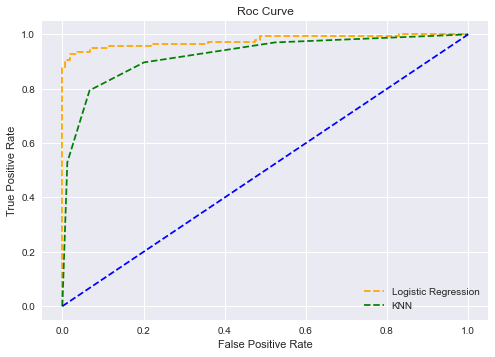

In [26]:
plt.plot(fpr1,tpr1,linestyle = '--',color = 'Orange', label = 'Logistic Regression')
plt.plot(fpr2,tpr2,linestyle = '--',color = 'Green', label = 'KNN')
plt.plot(p_fpr,p_tpr,linestyle = '--', color ='Blue')
plt.legend(loc = 'best')
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC',dpi = 300)
plt.show()

# ROC AUC Multi Class


In [27]:
from sklearn.multiclass import OneVsRestClassifier

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X,y = make_classification(n_samples=1000,n_features=20,n_classes=3,random_state=42,n_informative=3)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [33]:
clt = OneVsRestClassifier(LogisticRegression())

In [34]:
clt.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [35]:
pred = clt.predict(X_test)

In [36]:
pred_prob = clt.predict_proba(X_test)

In [37]:
fpr = {}
tpr = {}
threshhold = {}

In [38]:
n_class = 3

In [41]:
for i in range(n_class):
    fpr[i],tpr[i],threshhold[i] = roc_curve(y_test,pred_prob[:,i],pos_label=i)

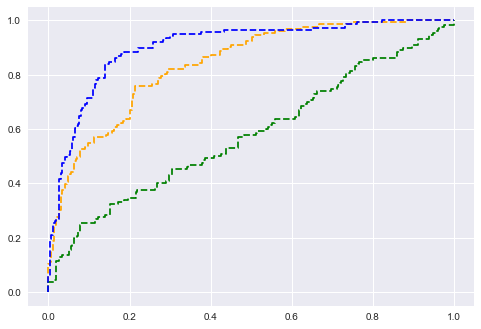

In [43]:
plt.plot(fpr[0],tpr[0],linestyle = '--',color = 'Orange', label = 'Class 0 vs Rest')
plt.plot(fpr[1],tpr[1],linestyle = '--',color = 'Green', label = 'Class 0 vs Rest')
plt.plot(fpr[2],tpr[2],linestyle = '--',color = 'Blue', label = 'Class 0 vs Rest')